In [ ]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/classify/main/data/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Notes
This session covers data collection and some procedures of data preparation.

Commands, functions, and methods:

!wget - Linux shell command for downloading data
pd.read.csv() - read csv files
df.head() - take a look of the dataframe
df.head().T - take a look of the transposed dataframe
df.columns - retrieve column names of a dataframe
df.columns.str.lower() - lowercase all the letters
df.columns.str.replace(' ', '_') - replace the space separator
df.dtypes - retrieve data types of all series
df.index - retrive indices of a dataframe
pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
df.fillna() - replace NAs with some value
(df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.
df['Weight'] = df['Weight'].astype(int) - this takes a single column of data and converts the data type

In [ ]:
len(df)

4455

In [ ]:
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [ ]:
df.shape

(4455, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [ ]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [ ]:
df.Status.unique()

array([1, 2, 0])

In [ ]:
df.corr()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260312,0.051025,0.099935,-0.094498,0.010535,0.278638,0.152722,0.029499,0.059807,0.032989,0.062401,0.153771,0.010297
Seniority,-0.260312,1.000000,-0.145878,-0.021320,0.505787,0.163433,-0.015674,-0.109339,0.125798,-0.034262,0.026380,0.005725,-0.007859,0.040922
Home,0.051025,-0.145878,1.000000,-0.020880,-0.270784,-0.260712,-0.013205,-0.032042,-0.334092,-0.022968,-0.020389,-0.043584,-0.019560,-0.026542
Time,0.099935,-0.021320,-0.020880,1.000000,-0.051966,0.049978,0.028094,-0.138454,-0.001059,-0.020246,-0.039491,-0.051170,0.431050,0.129796
Age,-0.094498,0.505787,-0.270784,-0.051966,1.000000,0.325652,0.060171,0.179447,0.248254,0.010653,0.053084,0.015971,0.028907,0.048739
Marital,0.010535,0.163433,-0.260712,0.049978,0.325652,1.000000,0.082440,0.034105,0.210315,0.004463,-0.007824,0.000985,0.054130,0.062537
Records,0.278638,-0.015674,-0.013205,0.028094,0.060171,0.082440,1.000000,0.033898,0.057329,0.034741,0.004926,0.008197,0.110349,0.085143
Job,0.152722,-0.109339,-0.032042,-0.138454,0.179447,0.034105,0.033898,1.000000,0.024170,0.102801,0.049138,0.029067,0.055833,0.056497
Expenses,0.029499,0.125798,-0.334092,-0.001059,0.248254,0.210315,0.057329,0.024170,1.000000,0.010664,-0.023255,-0.018899,0.048958,0.040162
Income,0.059807,-0.034262,-0.022968,-0.020246,0.010653,0.004463,0.034741,0.102801,0.010664,1.000000,0.092042,0.116399,0.019659,0.023088


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
df.sample(7)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1818,1,1,3,36,34,2,1,1,45,100,1800,1500,700,1296
44,2,2,2,60,43,2,1,2,75,71,3000,0,1500,1552
1059,1,6,0,12,25,1,1,1,35,69,99999999,99999999,500,1275
2837,1,7,2,60,44,2,1,1,45,112,3500,0,1450,1625
2206,1,4,5,60,28,5,1,1,35,185,0,0,1500,1797
4242,1,0,1,36,34,1,1,2,43,78,0,0,1200,1550
842,1,4,2,60,41,2,1,1,90,250,10000,2000,800,916


In [ ]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df = df[df.status != 0]   # Also make sure to treat the target variable

In [ ]:
df.status.unique()

array([1, 2])

In [ ]:
df['status'].unique()

array([1, 2])

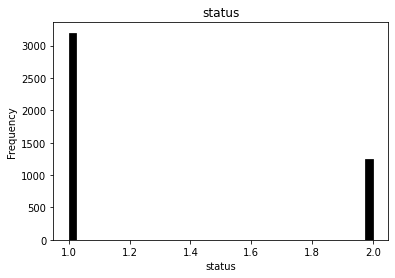

In [ ]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('status')

plt.show()

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [ ]:
df.status.value_counts() 

1    3200
2    1254
Name: status, dtype: int64

In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(3563, 891)

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']

In [ ]:
len(y_train),len(y_test)

(3563, 891)

In [ ]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names()  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

In [ ]:
X_test.shape

(891, 13)

LR: 0.810092 (0.035482)
Score for each of the 10 K-fold tests:  [0.80269355 0.82057004 0.82568843 0.77159455 0.84697401 0.82648454
 0.87052458 0.7381332  0.79860322 0.79965651]
LogisticRegression(solver='liblinear')
	Training time: 0.033s
	Prediction time: 0.404s

LDA: 0.811220 (0.037792)
Score for each of the 10 K-fold tests:  [0.81215401 0.81070394 0.84204827 0.74551282 0.84860558 0.82223487
 0.87167581 0.7501942  0.8081452  0.80092593]
LinearDiscriminantAnalysis()
	Training time: 0.021s
	Prediction time: 0.114s

KNN: 0.664181 (0.022899)
Score for each of the 10 K-fold tests:  [0.66198463 0.67541696 0.61593054 0.62670272 0.676513   0.6732878
 0.6726275  0.69469316 0.67011126 0.6745445 ]
KNeighborsClassifier()
	Training time: 0.008s
	Prediction time: 0.129s

CART: 0.641200 (0.028942)
Score for each of the 10 K-fold tests:  [0.67567958 0.64634719 0.64582689 0.61987179 0.64801745 0.65389869
 0.67410492 0.56782779 0.64231769 0.63810484]
DecisionTreeClassifier()
	Training time: 0.017s
	Pr

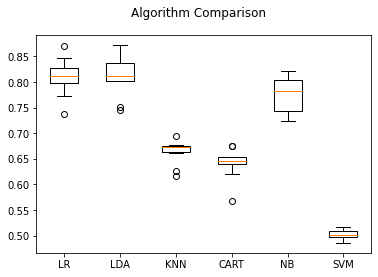

In [ ]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Pick a couple of models to go further

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.get_feature_names())
type(dt.feature_importances_)
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

In [ ]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.087 age
0.119 amount
0.069 assets
0.024 debt
0.061 expenses
0.032 home
0.178 income
0.036 job
0.019 marital
0.127 price
0.084 records
0.130 seniority
0.035 time


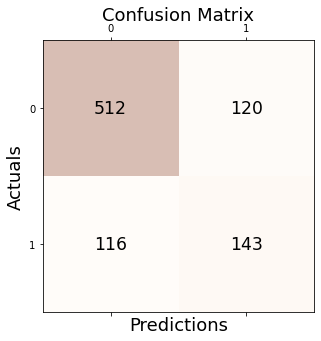

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Read this as a percentage - What proportion of positive identifications was actually correct?
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.815


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.810


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.735


In [ ]:
# This is just for the TRUE --- Not the False
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.813


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.81      0.81       632
           2       0.54      0.55      0.55       259

    accuracy                           0.74       891
   macro avg       0.68      0.68      0.68       891
weighted avg       0.74      0.74      0.74       891



In [ ]:
# Same info can be found in the score report
# Be ver careful about the data types. predict_proba returns a float
# predict returns a different data type
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('float')
f1_score(y_test, y_pred, average=None)

array([0.        , 0.26815642, 0.        ])

In [ ]:

# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [1 2 1 1 2 1 1 1 1 2]
The real first 10 labels [2 1 1 1 2 1 1 1 1 1]


In [ ]:
# How to make predictions with brand new values
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1043,3,1,36,32,1,1,3,35,0.0,0.0,0.0,950,1350


In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[21]].to_dict('records')[0]

{'seniority': 3,
 'home': 1,
 'time': 36,
 'age': 32,
 'marital': 1,
 'records': 1,
 'job': 3,
 'expenses': 35,
 'income': 0.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 950,
 'price': 1350}

In [ ]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[21]].to_dict('records')[0]
actual = y_train[[21]]

In [ ]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [ ]:
# The item to be predicted is passed in.  
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [ ]:
model_prediction(item,dv,dt)

2

In [ ]:
model_prediction_proba(item,dv,dt)

1.0

In [ ]:
actual

array([2])

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'seniority': 2,
 'home': 5,
 'time': 36,
 'age': 19,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 35,
 'income': 162.0,
 'assets': 4000.0,
 'debt': 100.0,
 'amount': 400,
 'price': 570}

In [ ]:
myItem = {'seniority': [2],
 'home': [5],
 'time': [3],
 'age': [39],
 'marital': [2],
 'records': [1],
 'job': [1],
 'expenses': [35],
 'income': [162.0],
 'assets': [4.0],
 'debt': [10000000.0],
 'amount': [40000000],
 'price': [57000000]}

In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

2

In [ ]:
# Hyperparamter tuning

In [ ]:
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Look at the model parameters.   You can tune these.
dt.get_params()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [20, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [ ]:
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0., 0., 0.])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.get_feature_names(),
 class_names=None,
 filled=True,
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
